### 분석 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
df = pd.DataFrame(digits['data'], columns=digits['feature_names'])
df["target"] = digits['target']
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
df.shape

(1797, 65)

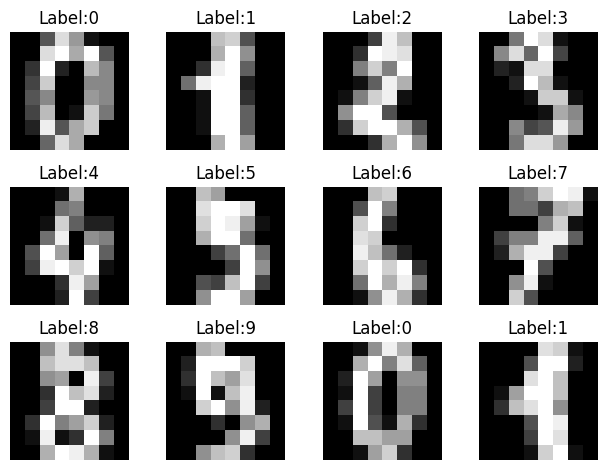

In [5]:
fig, axes = plt.subplots(3, 4)

for i in range(12):
    ax = axes[i//4, i%4]

    ax.imshow(df.iloc[i, :-1].values.reshape(8, 8), cmap='gray')
    ax.axis('off')
    ax.set_title('Label:%s'%str(df.iloc[i, -1]))

plt.tight_layout()
plt.show()

### PCA (주성분 분석)

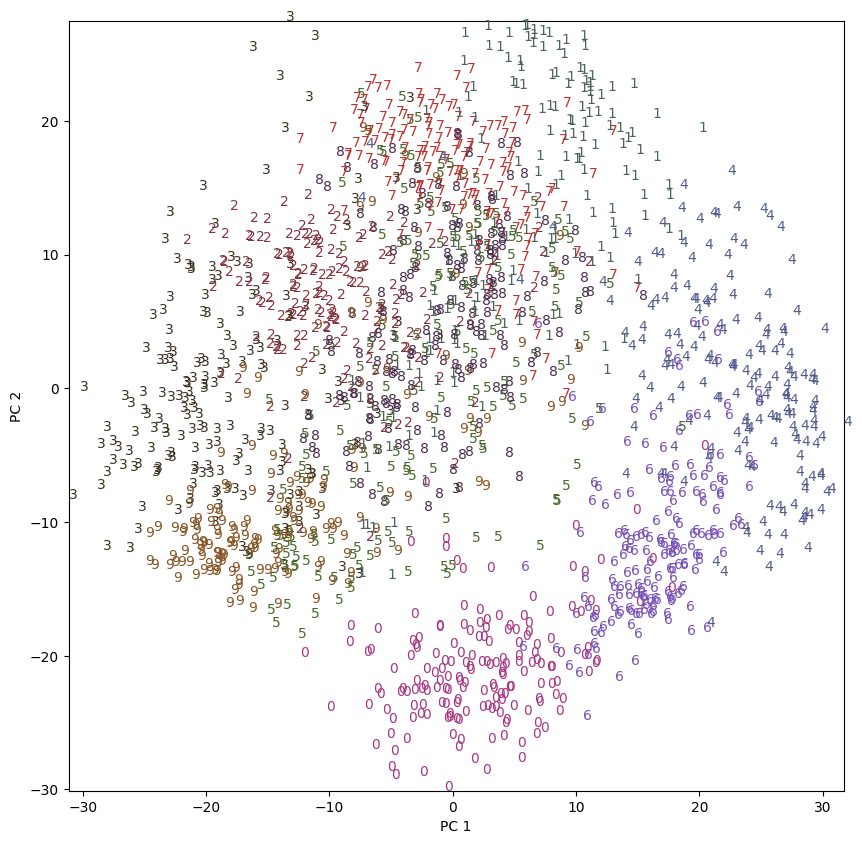

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.drop('target', axis=1))

df_pca = pca.transform(df.drop('target', axis=1))
colors = ["#A83683", "#4E655E", "#853541",
          "#3A3120","#535D8E", "#476A2A",
          "#7851B8", "#BD3430", "#4A2D4E",
          "#875525",
          ]

plt.figure(figsize=(10,10))
plt.xlim(df_pca[:, 0].min(), df_pca[:, 0].max())
plt.ylim(df_pca[:, 1].min(), df_pca[:, 1].max())

for i in range(len(df.drop('target', axis=1))):
    plt.text(df_pca[i, 0], df_pca[i,1], str(df['target'][i]), color = colors[df['target'][i]])


plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.show()

### t-SNE

- 데이터의 클러스터링과 패턴을 직관적으로 이해할 수 있으나, 대규모 데이터에 비효율적이며 계산 비용이 높다.

https://blog.naver.com/cksk0018/223718025838

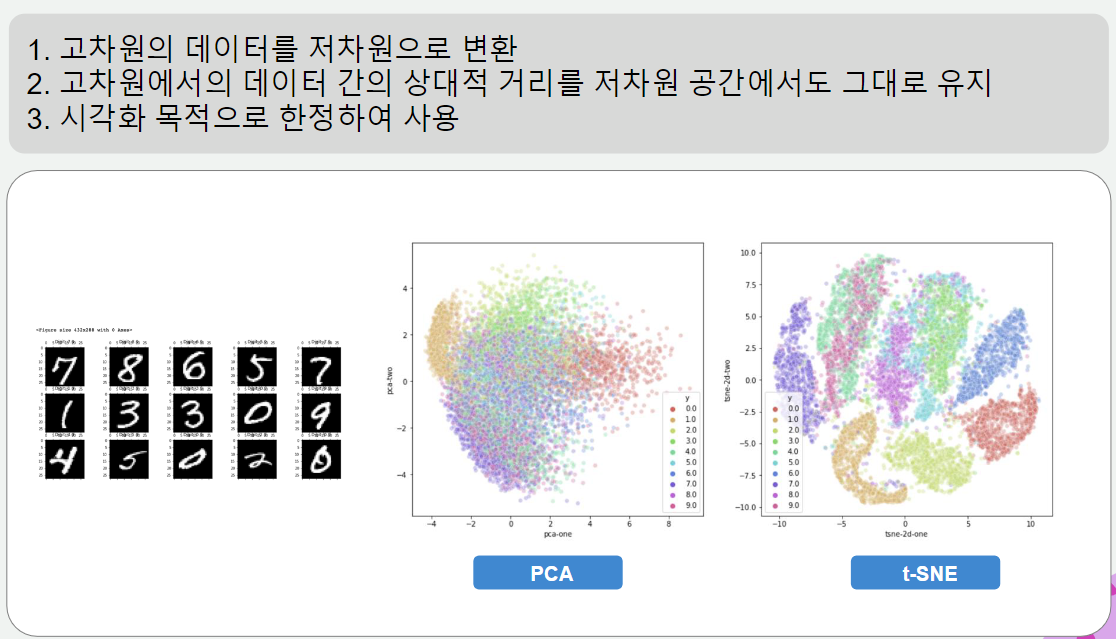

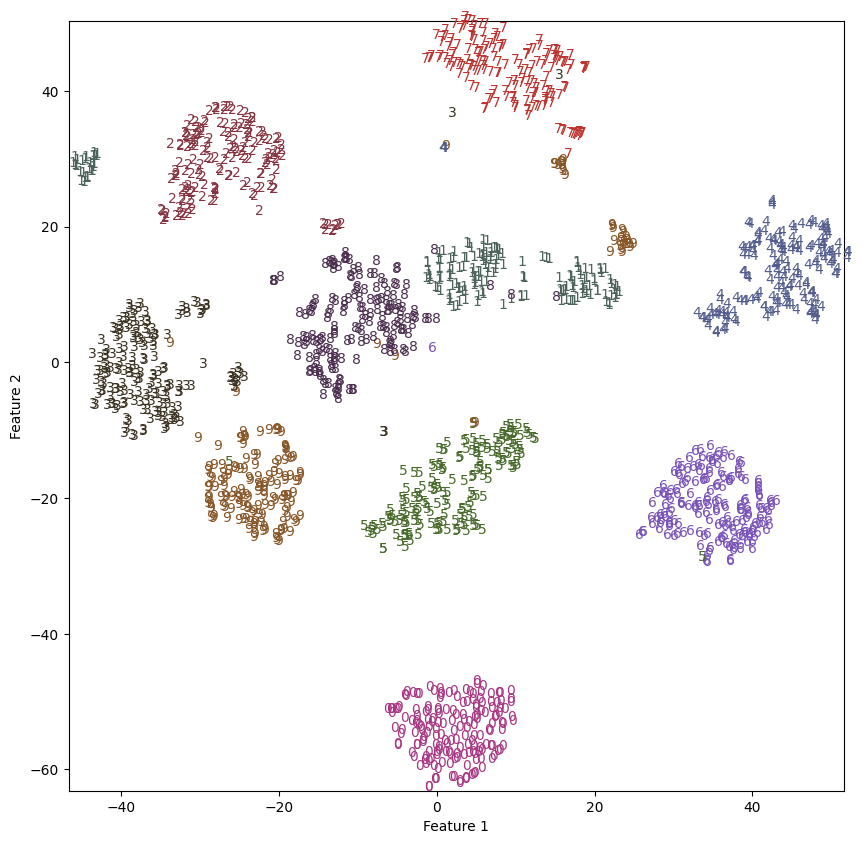

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df.drop('target', axis=1))

colors = ["#A83683", "#4E655E", "#853541",
          "#3A3120","#535D8E", "#476A2A",
          "#7851B8", "#BD3430", "#4A2D4E",
          "#875525",
          ]

plt.figure(figsize=(10,10))
plt.xlim(df_tsne[:, 0].min(), df_tsne[:, 0].max())
plt.ylim(df_tsne[:, 1].min(), df_tsne[:, 1].max())

for i in range(len(df.drop('target', axis=1))):
    plt.text(df_tsne[i, 0], df_tsne[i,1], str(df['target'][i]), color = colors[df['target'][i]])


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()